In [1]:
from sklearn import datasets

In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import  matplotlib.pyplot as plt

In [5]:
x_data ,y_data = datasets.make_regression(n_samples=200,
                                         n_features = 1,
                                         n_informative = 1,
                                         n_targets = 1,
                                         noise =10.0)

In [6]:
y_data = y_data.reshape(-1,1)

In [7]:
y_data.shape

(200, 1)

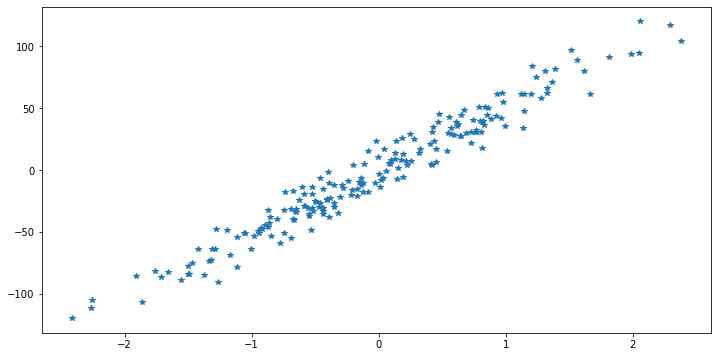

In [8]:
plt.figure(figsize=(12,6))
plt.plot(x_data,y_data,"*")
plt.show()

划分数据集

In [27]:
X_train,X_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.3)

In [28]:
X_train.shape

(140, 1)

In [29]:
y_train.shape

(140, 1)

In [30]:
n_input = X_train.shape[1]
n_output = y_train.shape[1]

In [31]:
x = tf.placeholder(tf.float32,shape=(None,n_input),name="x")
y = tf.placeholder(tf.float32,shape=(None,n_output),name="y")

In [32]:
w = tf.Variable(np.zeros((n_input,n_output)),dtype = tf.float32,name="w")
b = tf.Variable(np.zeros((n_output)),dtype = tf.float32,name="b")

In [33]:
y_hat = tf.matmul(x,w)+b

In [34]:
cost = tf.reduce_mean(tf.squared_difference(y_hat,y))

In [35]:
gradience = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [36]:
num_epochs = 500
cost_epochs = []
w_hat = 0
b_hat = 0

In [37]:
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        tfs.run(gradience,feed_dict={x:X_train,y:y_train})
        cost_val = tfs.run(cost,feed_dict={x:X_train,y:y_train})
        cost_epochs.append(cost_val)
    w_hat,b_hat = tfs.run([w,b])
    test_cost = tfs.run(cost,feed_dict={x:X_test,y:y_test})

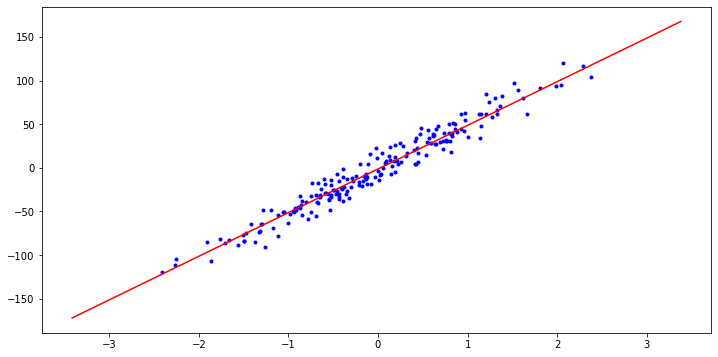

In [38]:
plt.figure(figsize =(12,6))
x_plot = np.array([[np.min(x_data)-1],[np.max(x_data)+1]])
y_plot = np.matmul(x_plot,w_hat)+b_hat
plt.plot(x_data,y_data,"b.")
plt.plot(x_plot,y_plot,"r")
plt.show()

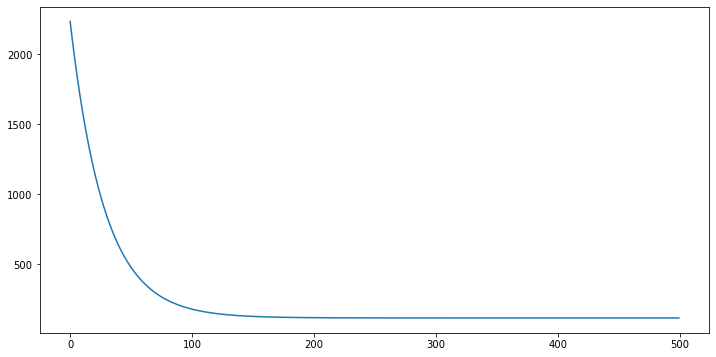

In [39]:
plt.figure(figsize=(12,6))
plt.plot(cost_epochs)
plt.show()